In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

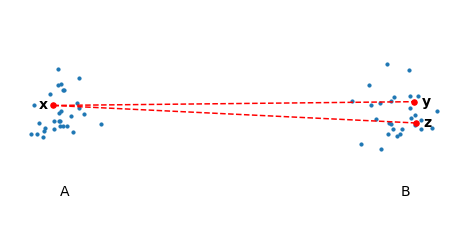

In [2]:
np.random.seed(5)
points = np.vstack((np.random.normal([-10, 0], 1, (30, 2)), np.random.normal([10, 0], 1, (30, 2))))

_, ax = plt.subplots(figsize=(8, 4))
ax.scatter(points[:, 0], points[:, 1], s=10)
ax.set_ylim([-5, 5])
ax.set_xticks([]), ax.set_yticks([]), ax.axis('off')
ax.text(-10, -3.5, "A", fontsize=14)
ax.text(10, -3.5, "B", fontsize=14)

x = points[6]
ax.text(x[0] - 0.9, x[1] - 0.14, "$\\mathbf{x}$", fontsize=14)
ax.scatter(x[0], x[1], s=30, c="r")

y = points[41]
ax.scatter(y[0], y[1], s=30, c="r")
ax.text(y[0] + 0.4, y[1] - 0.14, "$\\mathbf{y}$", fontsize=14)

z = points[38]
ax.scatter(z[0], z[1], s=30, c="r")
ax.text(z[0] + 0.4, z[1] - 0.14, "$\\mathbf{z}$", fontsize=14)

plt.plot([x[0], y[0]], [x[1], y[1]], "r", linestyle="dashed")
plt.plot([x[0], z[0]], [x[1], z[1]], "r", linestyle="dashed")

plt.savefig("two_clusters.png", dpi=80, rasterize=True, transparent=True)

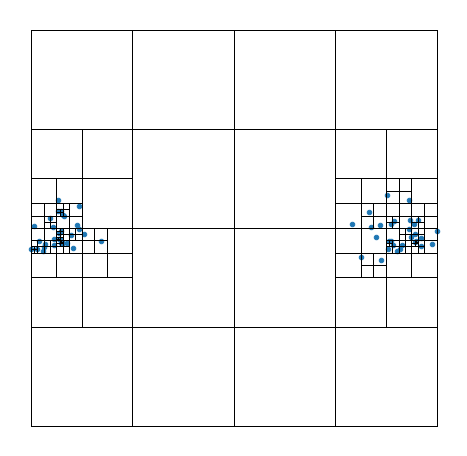

In [3]:
import pyximport; pyximport.install()
from tests import quad_tree_debug
from openTSNE.quad_tree import QuadTree

tree = QuadTree(points)
quad_tree_debug.plot_tree(tree, points)

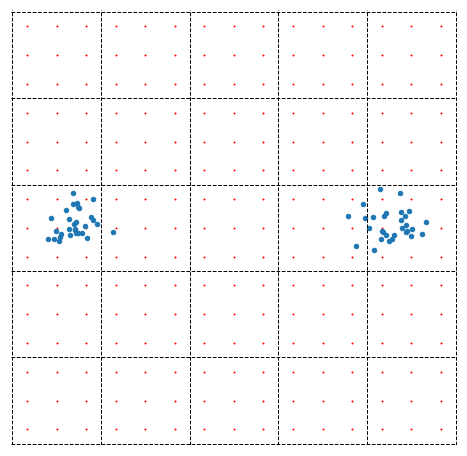

In [4]:
n_boxes = 5
n_points = 3

xs = np.linspace(-13, 13, n_boxes * n_points)
ys = np.linspace(-13, 13, n_boxes * n_points)
xv, yv = np.meshgrid(xs, ys)

diff = (xs[1] - xs[0]) / 2

_, ax = plt.subplots(figsize=(8, 8))
ax.scatter(xv.ravel(), yv.ravel(), c="r", s=1)

xs1 = np.linspace(-13 - diff, 13 + diff, n_boxes + 1)
ys1 = np.linspace(-13 - diff, 13 + diff, n_boxes + 1)

ax.set_ylim(-13.1 - diff, 13.1 + diff)
ax.set_xlim(-13.1 - diff, 13.1 + diff)

for y in ys1:
    ax.plot([-13.1 - diff, 13.1 + diff], [y, y], "k", linestyle="dashed", linewidth=1)

for x in xs1:
    ax.plot([x, x], [-13.1 - diff, 13.1 + diff], "k", linestyle="dashed", linewidth=1)
    
ax.scatter(points[:, 0], points[:, 1], s=20)

ax.set_xticks([]), ax.set_yticks([]), ax.axis('off')

plt.savefig("interpolation_grid.png", dpi=80, rasterize=True, transparent=True)

In [5]:
len(xv.ravel())

225

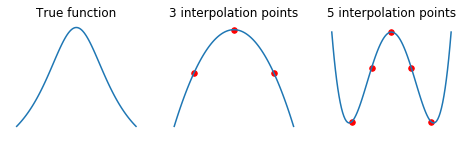

In [6]:
from scipy.interpolate import lagrange

def cauchy(x):
    return np.array(1 + x ** 2, dtype=float) ** -1

x_ = np.linspace(-1.5, 1.5, 100)

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 2))

ax[0].set_title("True function")
ax[0].plot(x_, cauchy(x_))

x = np.linspace(-1, 1, 3)
y = cauchy(x)
poly = lagrange(x, y)
ax[1].set_title("3 interpolation points")
ax[1].scatter(x, y, c="r", s=30)
ax[1].plot(x_, poly(x_))

x = np.linspace(-1, 1, 5)
y = cauchy(x)
poly = lagrange(x, y)
ax[2].set_title("5 interpolation points")
ax[2].scatter(x, y, c="r", s=30)
ax[2].plot(x_, poly(x_))

for i in range(3):
    ax[i].set_xticks([]), ax[i].set_yticks([]), ax[i].axis('off')

plt.savefig("runge.png", dpi=80, rasterize=True, transparent=True)

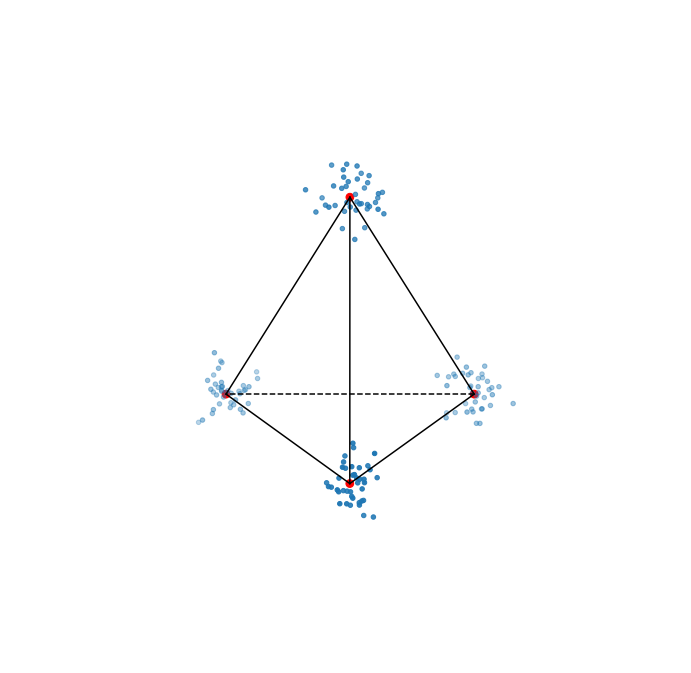

In [7]:
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1)

centers = np.array([
    [np.sqrt(8 / 9), 0, -1 / 3],
    [-np.sqrt(2 / 9), np.sqrt(2 / 3), -1 / 3],
    [-np.sqrt(2 / 9), -np.sqrt(2 / 3), -1 / 3],
    [0, 0, 1],
])

coords = np.vstack((np.random.normal(c, 0.1, (40, 3)) for c in centers))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2])
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c="r", alpha=1, s=60)
ax.plot(centers[[0, 1], 0], centers[[0, 1], 1], centers[[0, 1], 2], "k", linestyle="solid")
ax.plot(centers[[0, 2], 0], centers[[0, 2], 1], centers[[0, 2], 2], "k", linestyle="solid")
ax.plot(centers[[0, 3], 0], centers[[0, 3], 1], centers[[0, 3], 2], "k", linestyle="solid")
ax.plot(centers[[1, 2], 0], centers[[1, 2], 1], centers[[1, 2], 2], "k", linestyle="dashed")
ax.plot(centers[[1, 3], 0], centers[[1, 3], 1], centers[[1, 3], 2], "k", linestyle="solid")
ax.plot(centers[[2, 3], 0], centers[[2, 3], 1], centers[[2, 3], 2], "k", linestyle="solid")

ax.set_xticks([]), ax.set_yticks([]), ax.axis('off')

ax.view_init(20, 0)

plt.savefig("tetrahedron.png", dpi=80, rasterize=True, transparent=True)

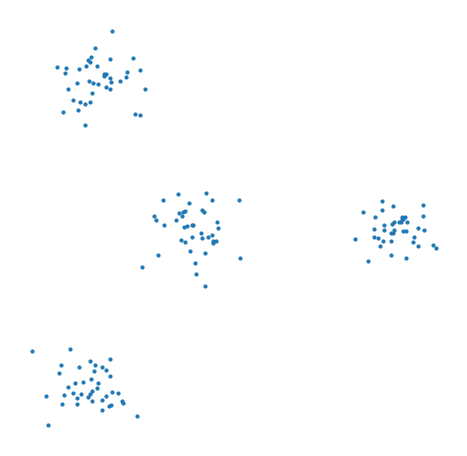

In [8]:
_, ax = plt.subplots(figsize=(8, 8))
ax.scatter(coords[:, 0], coords[:, 1], s=10)

ax.set_xticks([]), ax.set_yticks([]), ax.axis('off')

plt.savefig("tetrahedron_2d.png", dpi=80, rasterize=True, transparent=True)

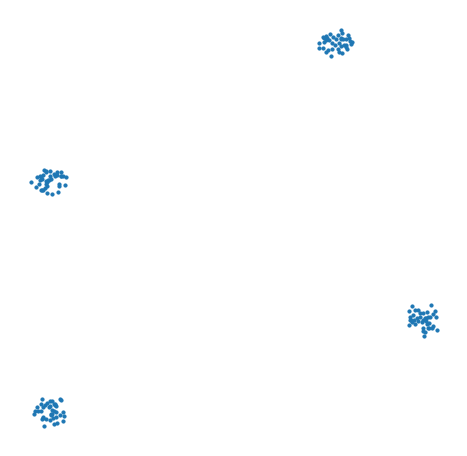

In [9]:
from openTSNE import TSNE

embedding = TSNE(neighbors="exact", negative_gradient_method="bh").fit(coords)

_, ax = plt.subplots(figsize=(8, 8))
ax.scatter(embedding[:, 0], embedding[:, 1], s=10)

ax.set_xticks([]), ax.set_yticks([]), ax.axis('off')

plt.savefig("tetrahedron_tsne.png", dpi=80, rasterize=True, transparent=True)